# Image Processing

### Nested `for` Loops, Functions as Parameters, Namespaces, and Lists of Lists

The primary purpose of this chapter is to introduce pixel-based image processing, to understand passing functions as parameters, and to have fun implementing some image processing algorithms.

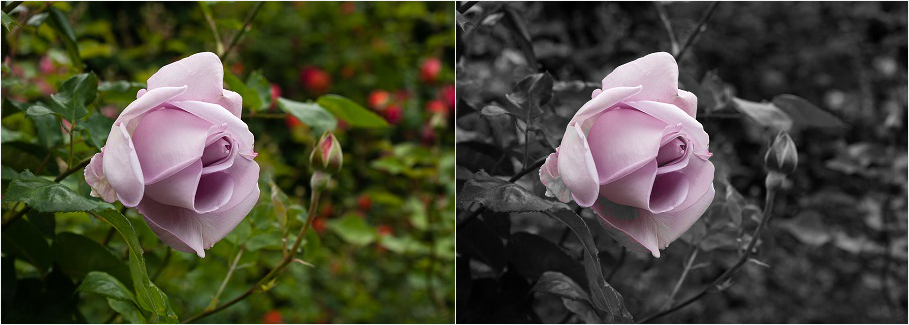

Our work will be based on a standard python image processing module called PIL (or pillow). This module allows us to read, manipulate, and save a variety of image formats including JPEG and PNG. However we will be using the cImage library, which sits on top of PIL and simplifies its use. If you write more serious image editing software, you should probably go straight to the PIL library as it is faster and more powerful. Most real image editing is written in C++ because the code runs much faster.

#### Your jupyter installation should include the Python Image Library (PIL or pillow)

But if you try to run python straight from the command line, you may find that the PIL module will not load correctly. There are some additional configuration settings that jupyter has setup that are missing from the raw command line. If you start up an Anaconda command prompt, it will be setup correctly.

#### Pillow's "ImageWin" object has some issues with jupyter

When you create the ImageWin object through jupyter, the new GUI window will freeze. You can continue to use your jupyter notebook, but you cannot move, resize, or close the ImageWin GUI. You can recover by restarting the jupyter kernel. It works but is just a little annoying.

#### You'll need to download the cImage library from the internet

The library is available on [Bradley Miller's GitHub](https://github.com/bnmnetp/cImage). You'll need the image.py file and nothing else. Place image.py in your site-packages directory. If you do not know where this is located, you can run the following code to find your site-packages directory.

```
import site
site.getsitepackages()
```

In an absolute pinch, you can place this file in the same directory as this current jupyter notebook or whatever project is using cImage.

#### The book was written with an older version of the cImage library than what we will be using

This means that a few of the functions have changed the order of their parameters. Also, the name of the module has been changed to `image` rather than `cImage`. Don't worry, all of the code in this notebook uses it correctly.

In [ ]:
import image

# Open the original image and get it's dimensions
originalImage = image.FileImage("flower.jpg")
width = originalImage.getWidth()
height = originalImage.getHeight()

# Create a new image that has the same dimensions as the original, but is offset to appear next to the original
editedImage = image.EmptyImage(width, height)
editedImage.setPosition(width + 1, 0)

# Step through every pixel (column x row) and alter the RGB values of the pixel
for x in range(width):
    for y in range(height):
        pixel = originalImage.getPixel(x, y)
        r = pixel.getRed()
        g = pixel.getGreen()
        b = pixel.getBlue()
      
        # If the pixel color is not "sufficiently purple" then make it black and white
        if not (b > g and r > g and b > r // 1.5):
            avg = (r + g + b) // 3   # get the average intensity of the three pixel colors
            r = g = b = avg          # assign each individual color to point to the average intensity
            pixel = image.Pixel(r, g, b)

        # Write the new pixel to the new image
        editedImage.setPixel(x, y, pixel)

# Create a window for displaying the two images and then add them to the window
graphicsWindow = image.ImageWin(width * 2, height, "Purple Highlights")
originalImage.draw(graphicsWindow)
editedImage.draw(graphicsWindow)

## 6.2 What is Digital Image Processing

Starting on page 177

Digital Image Processing is the editing and manipulation of digital pictures. No doubt you've all used photo editing software. Most phones allow you to adjust the light levels on pictures and come with a selection of filters to apply. There are lots of different image formats, from GIF to JPEG; RAW; PNG; and more. No matter the format, all of these images are made up of a collection of pixels. If you've ever zoomed in closely on an image, you've likely seen the individual pixels. Here are some of the pixels in the picture of the purple flower.

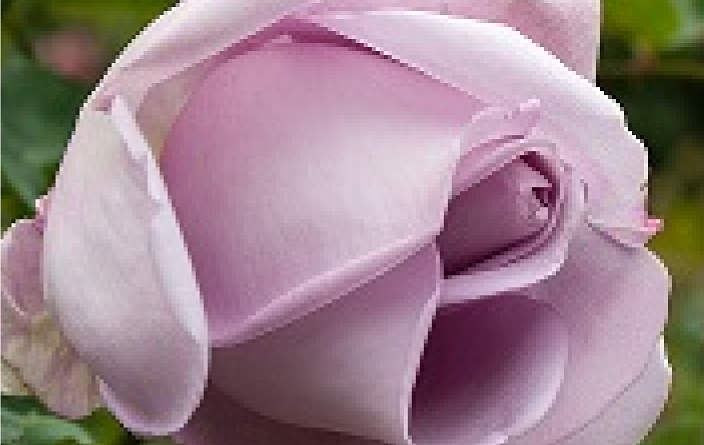

Pixels are small dots that are assigned a particular color by specifying an amount of **r**ed, **g**reen, and **b**lue light (red, green, and blue are the primary colors). Many pixels are stored with 24-bits of information: 8-bits store the value of red, 8-bits for green, and 8-bits for blue. This allows for $255$ different values for each color component and for $256 \times 256 \times 256 = 16,777,216$ total colors! Digital Image Processing changes the value of these pixels in order to alter the image.

We are going to use the `cImage` library to access GIF, JPEG, and/or PNG images. No matter what format the picture is stored as, `cImage` will load it as a 2D array of pixels, each having an RGB value.

#### Note: There is a reference for the `cImage` object on pages 180 and 181

But remember that the book shows a different order of parameters passed to `ImageWin` than the version of `cImage` that we are using.

In [ ]:
import image
p = image.Pixel(200, 100, 150)
p

In [ ]:
p.getRed()

In [ ]:
p.setBlue(20)
p

In [ ]:
butterfly = image.FileImage("butterfly.png")          # loads an image from disk
win1 = image.ImageWin(butterfly.GetWidth(), butterfly.GetHeight(), "Image Processing")
butterfly.draw(win1)                                  # draws the image in the window

In [ ]:
butterfly.getWidth()

In [ ]:
butterfly.getHeight()

In [ ]:
butterfly.getPixel(124,165)

In [ ]:
win2 = image.ImageWin(300, 300, "Empty Image")       # creates a second window
empty = image.EmptyImage(300, 300)                   # creates an empty image
empty.draw(win2)                                     # draws the empty image in the window

In [ ]:
# Note: the version of cImage in the book starts with a black background, but our version starts with a white background
win3 = image.ImageWin(300, 300, "Line Image")
line = image.EmptyImage(300, 300)

black = image.Pixel(0, 0, 0) 
for i in range(line.getHeight()):
    line.setPixel(i, i, black)                       # we can easily change the color of pixels at col (x) and row (y)

line.draw(win3)
line.save("blackLine.gif")

### Exercises

Complete the exercises on page 184

- 6.1 - modify the diagonal line to use random pixel colors
- 6.4 - open a window with an image of your choice

## 6.3 Basic Image Processing

Starting on page 185

There's a basic process that we're going to go through for each image manipulation algorithm:

1. Extract a pixel (probably getting the specific RGB color components)
- Build a new or filter the existing pixel
- Place the new pixel back into the image at the proper coloumn and row (or create a compeltely new image)

Most of the time, we're applying the image filter to all of the pixels in the picture, so we'll execute these functions in some sort of a loop that steps through every single pixel, one at a time. This means we'll need two loops, one that iterates through all of the rows and another that iterates through all of the columns.

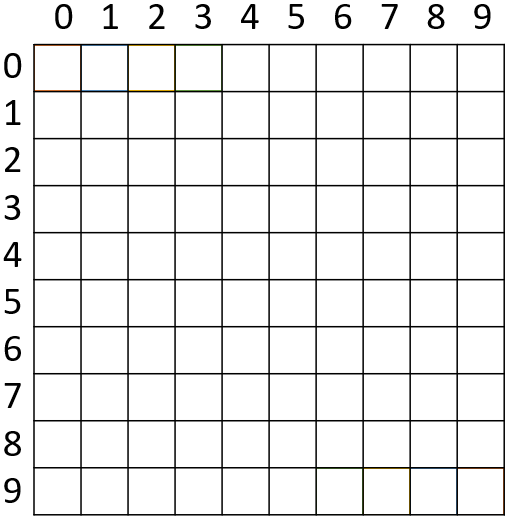

Once we have our nested loops working, there are some cool transforms we can do that are relatively simple. We'll start with these two:

1. Creating a negative (or inverse) image
- Converting a photo to black and white

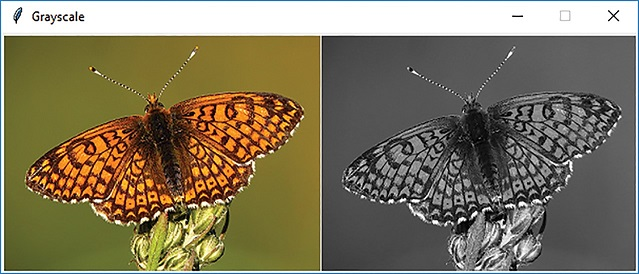
<center>© Luka Hercigonja/Shutterstock.</center>

In [ ]:
import image

# just a basic exmaple of changing a clump of pixels near location 83, 117
butterfly = image.FileImage("butterfly.png")   

for x in range(25):
    for y in range(25):
        pixel = butterfly.getPixel(83+x, 117+y)
        r = pixel.getRed() // 3    # darken red
        g = pixel.getGreen() // 3  # darken green
        b = pixel.getBlue() // 3   # darken blue
        pixel = image.Pixel(r, g, b)
        butterfly.setPixel(83+x, 117+y, pixel)

window = image.ImageWin(butterfly.getWidth(), butterfly.getHeight(), "Darkened Image")
butterfly.draw(window)

### Create Negative Images

The negative of an image turns the whites (255, 255, 255) to blacks (0, 0, 0); the almost-blacks (5, 5, 5) to almost-whites (250, 250, 250); and all of the other colors to their inverse. If you think of the value for each color as being an offset from the zero, then we create the inverse by subtracting this same offset from 255.

So, for example, the inverse of red (255, 0, 0) is cyan (0, 255, 255):

$$\begin{align}
color &= 0 + offset \\
red &= 0 + 255 \\
green &= 0 + 0 \\
blue &= 0 + 0
\end{align}$$

If we invert these offsets, then red turns into cyan:

$$\begin{align}
color &= 255 - offset \\
red &= 255 - 255 \\
green &= 255 - 0 \\
blue &= 255 - 0
\end{align}$$

In [ ]:
import image

def negativePixel(oldPixel):
    newRed   = 255 - oldPixel.getRed()
    newGreen = 255 - oldPixel.getGreen()
    newBlue  = 255 - oldPixel.getBlue()
    newPixel = image.Pixel(newRed, newGreen, newBlue)
    return newPixel

In [ ]:
p = image.Pixel(155, 23, 255)
negativePixel(p)

#### Iterating through all of the pixels in an image

We can "nest" two `for` loops to iterate through all the possible combinations of each loop. For example, if we wanted to find all combinations of the numbers 0-2 and the letters C-A-T, we could use a nested `for` loop to produce 0c, 0a, 0t, 1c, 1a, 1t, 2c, 2a, 2t. We'll use the same approach to enumerate all possible pixel locations at column & row.

In [ ]:
for num in range(3):
    for ch in "cat":
        print(num, ch)

In [ ]:
import image

butterfly = image.FileImage("butterfly.png")
width = butterfly.getWidth()
height = butterfly.getHeight()  

negative = image.EmptyImage(width, height)
for row in range(height):                                   # iterate through every row
    for col in range(width):                                # within each row, iterate over every column
        pixel = butterfly.getPixel(col, row)
        r = 255 - pixel.getRed()
        g = 255 - pixel.getGreen()
        b = 255 - pixel.getBlue()
        pixel = image.Pixel(r, g, b)
        negative.setPixel(col, row, pixel)
            
win5 = image.ImageWin(width * 2, height, "Negative Image")  # create a window that is large enough to hold both images
butterfly.draw(win5)                                        # draw the original butterfly at the origin (by default)

negative.setPosition(width + 1, 0)                          # set the position of the negative image to be on the right side
negative.draw(win5)                                         # draw the negative image

### Create Grayscale Images

Grayscale images are nothing more than a simulated black and white photograph. Gray is a color with equal amounts of red, blue, and green. Although some grays are lighter or darker than others. So we might say that black is the darkest gray at $(0, 0, 0)$ and white is the lightest shade of gray at $(255, 255, 255)$. What we normally think of as "neutral" gray is $(128, 128, 128)$.

To convert an image to grayscale, we simply measure the overal ***intensity*** of a pixel and then set the new pixel to have equal RGB colors, but each one set to the ***average intensity*** of the overal pixel:

$$average(intensity) = \frac{red + green + blue}{3}$$

We'll also find that these digital image processing algorithms would be better placed inside of functions.

In [ ]:
import image

def convertPixelToGray(pixel):
    totIntensity = pixel.getRed() + pixel.getGreen() + pixel.getBlue()
    avgIntensity = totIntensity // 3
    bstIntensity = avgIntensity * 3 / 2
    pixel = image.Pixel(avgIntensity, avgIntensity, avgIntensity)
    return pixel

In [ ]:
convertPixelToGray(image.Pixel(34, 128, 74))

In [ ]:
convertPixelToGray(image.Pixel(200, 234, 165))

In [ ]:
def makeGrayscale(originalImage):
    
    width = originalImage.getWidth()
    height = originalImage.getHeight()  
    modifiedImage = image.EmptyImage(width, height)
    
    for row in range(height):
        for col in range(width):
            pixel = originalImage.getPixel(col, row)
            pixel = convertPixelToGray(pixel)
            modifiedImage.setPixel(col, row, pixel)
            
    modifiedImage.setPosition(width + 1, 0)
    return modifiedImage

In [ ]:
butterfly = image.FileImage("butterfly.png")
grayscale = makeGrayscale(butterfly) 

win6 = image.ImageWin(butterfly.getWidth() * 2, butterfly.getHeight(), "Grayscale Image")
butterfly.draw(win6)
grayscale.draw(win6)  

### Exercises

Complete the exercises on page 190

- 6.7 - remove all red from a pixel
- 6.8 - enhance the intensity of red (make it stronger)
- 6.9 - diminishes the intensity of blue

### Homework
Exercise 6.8, 6.9, and 6.10 are due as homework. Submit through code through Blackboard. You don't need a whole python file, you can just type up the python.

## -- END OF DAY 1 --

### Passing Functions as Parameters

There's a lot of similarity between the code that generates a negative image and the code that generates a grayscale image:

1. Get the width and height of the original image
* Create an new image that is the same size as the original
* Iterate through every pixel in the image
  * Extract a pixel
  * Build a new pixel (this is the only step different between the two algorithms)
  * Place the new pixel back in the image at the same column and row
* Set the location of the new image to be on the right side

We can create a generic "pixel mapper" function that takes two parameters: an image and a pixel generating ***function***. Yes, with python you can pass functions as parameters. Let's see how it's done.

In [ ]:
def squareIt(n):
    return n * n

In [ ]:
squareIt(3)           # just passes 3

In [ ]:
squareIt(squareIt(3)) # passes 3 to the inner function, computes the answer,
                      # and then passes the answer to the outer function

In [ ]:
squareIt

In [ ]:
z = squareIt

In [ ]:
z(3)

In [ ]:
z

In [ ]:
def test(function, n):  # 'function' looks like a normal paramter, but we use it as a function
    return function(n)

test(squareIt, 3)       # just pass the name of the function, don't use parenthesis

In [ ]:
test(squareIt, 5)

In [ ]:
test(squareIt, 10)

In [ ]:
test(squareIt(3), 5)    # we shouldn't have used the parenthesis

In [ ]:
import image

# function to calculate the negative version of a pixel
def convertPixelToNegative(oldPixel):
    newRed   = 255 - oldPixel.getRed()
    newGreen = 255 - oldPixel.getGreen()
    newBlue  = 255 - oldPixel.getBlue()
    return image.Pixel(newRed, newGreen, newBlue)

# function to create a grayscale version of a pixel
def convertPixelToGray(pixel):
    totIntensity = pixel.getRed() + pixel.getGreen() + pixel.getBlue()
    avgIntensity = totIntensity // 3
    return image.Pixel(avgIntensity, avgIntensity, avgIntensity)

In [ ]:
def pixelMapper(old, rgbFunction):
    
    width = old.getWidth()
    height = old.getHeight()
    new = image.EmptyImage(width, height)
    
    for row in range(height):
        for col in range(width):
            pixel = old.getPixel(col, row)
            new.setPixel(col, row, rgbFunction(pixel))
    
    return new

In [ ]:
def imageTransform(imageFile, rgbFunction):
    
    old = image.FileImage(imageFile)
    width = old.getWidth()
    height = old.getHeight()
    
    new = pixelMapper(old, rgbFunction)
    new.setPosition(width + 1, 0)

    win = image.ImageWin(width * 2, height, "Image Transform")
    old.draw(win)
    new.draw(win)
   

In [ ]:
imageTransform("butterfly.png", convertPixelToGray)

### Be careful passing functions

Function passing, ***when used correctly***, can simplify otherwise complicated code. It is snazzy and elegant and cool. But it is prone to security bugs. It can also be slow due to the extra function calls. In most code, the extra function calls wouldn't affect the performance very much. But the way we've done it here in a tight loop--calling the function for every single pixel in the image--can really slow down your code.


### Exercises

Complete the exercises on page 194

- 6.13 - Use `imageTransform()` function and `negativePixel()` from last class to convert an image to it's negative
- 6.14 - Write a function to remove all red from an image (you probably have this code from the last homework) and test it using the `imageTransform()` function
- 6.17 - Write a function to create a Sepia tone filter (the formula is given in the book)

## 6.4 Parameters, Parameter Passing, and Scope

Starting on page 194

This section takes a quick look at how parameters are passed in python. You'll find that it's pretty easy to figure out since you already know C#. But there are a few differences.

The first difference is that *everything* in python is an object, even literal numbers. This means that everything is passed by reference.

In python, the parameters that a function *receives* are called the ***formal parameters*** and the objects that are passed to functions are called ***actual parameters***. It's important to understand the difference, but to be honest I don't hear the terms used very much.

In [ ]:
import math

# Notice we've added a docstring immediately after the function definition using triple-quotes
def hypotenuse(a, b):
    """ Returns the length of the hypotenuse on a right triangle """
    
    print("a =", a)
    print("b =", b)
    c = math.sqrt(a**2 + b**2)
    return c

hypotenuse(3, 4)

In [ ]:
side1 = 3
side2 = 4
hypotenuse(side1, side2)

In [ ]:
hypotenuse(side1 * 2, side2 * 2)

In [ ]:
# Put the cursor in the function and press shift-tab
hypotenuse

#### Parameter Passing: Call by Assignment

Python uses a system known as ***call by assignment*** to pass parameters to functions:

1. The actual parameters are evaluated (e.g., side1 * 2). The result of the evaluation is itself an object. A reference to this object is passed to the function.
- Function is ***invoked*** and each formal parameter becomes a new name for the objects being passed in
- Inside of the function, any changes to the formal parameters ***may or may not*** affect the actual parameters that were passed in. It depends on whether the object is mutable (e.g., lists) or immutable (e.g., strings or numbers). This is the second important difference between python and C#. With C#, anything passed by reference would be really changed by the method.

### Namespaces

All names in python exist within a namespace (this is similar to C#). By default there are two namespaces: `__builtins__` and `__main__`. All of the built-in functions like `sum`, `range`, `float`, and `sorted` exist in the builtin namespace. As you start typing out code, everything that you declare is put in the main namespace by default. The `dir` function will tell us all of the names in a given namespace.

In [ ]:
import math

def hypotenuse(a, b):
    """ Returns the length of the hypotenuse on a right triangle """
    print("a =", a)
    print("b =", b)
    c = math.sqrt(a**2 + b**2)
    return c

side1 = 3
side2 = 4

dir()

In [ ]:
names = dir(__builtins__)
print(names[:5])
print("...")
print(names[-5:])

In [ ]:
__doc__

In [ ]:
__name__

In [ ]:
mathNames = dir(math)
print(mathNames[:5])
print("...")
print(mathNames[-5:])

#### Importing Modules

There are two different ways to import modules, one that loads the module into the `__main__` namespace and one that loads the names from the module into the namespace.

Consider the first way:

```
import math
math.sqrt(4)
```

As opposed to the second way:

```
from math import *
sqrt(4)
```

#### Writing Programs that can be Imported as a Module

When we write a python program, it likely contains code that might be reused elsewhere. The functions that you declare will work just fine called from your program or if your program is imported as a module.

But if you just put the "main" part of your program at the bottom, then this code will run when the module is imported. But you probably only want this "main" code to write if your program is being used as a program, not if it's being used as a module. You can get around this by adding a "main function", like this:

In [ ]:
def hypotenuse(a, b):
    """ Returns the length of the hypotenuse on a right triangle """
    print("a =", a)
    print("b =", b)
    c = math.sqrt(a**2 + b**2)
    return c

# This is the way that we normally create a "Main" function in python
if __name__ == "__main__":
    side1 = 3
    side2 = 4
    print(hypotenuse(side1, side2))

When functions are executed, they receive a local namespace. All variables within the function are placed within the local namespace, which is destroyed when the function exits.

## 6.5 Advanced Image Processing

 Starting on page 204
 
There are many other fun changes that we can apply to images. Some of them are based on the repositioning the pixels (e.g., flipping the picture, rotating the picture, or mirroring the picture) and others that are more like filters (edge detection and blurring). We'll find that the filtering techniques are difficult at first, but that there are enough similarities between them that it becomes easier.

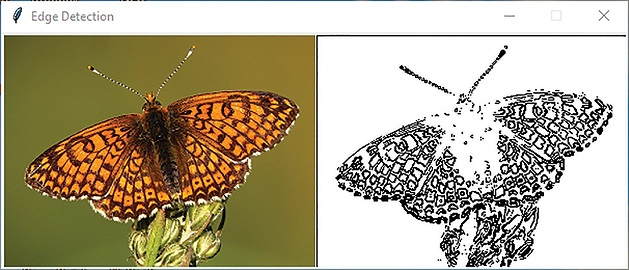
<center>© Luka Hercigonja/Shutterstock.</center>

### Resizing Images

This technique for resizing an image allows you to enlarge it by a factor of 2, 3, 4, etc. It does not work at all for shrinking an image and would be a poor choice for a generic enlargement function. We'll see a better technique a little later.

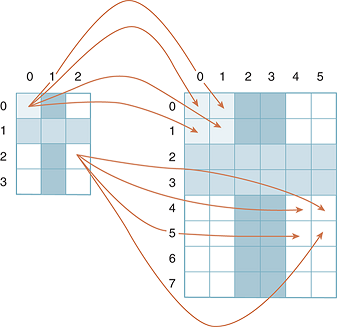

Here's the basic idea: to double the size of an image, we create a new image that has twice the height and twice the width as the original. Then we map each 1x1 square from the original image (i.e., a single pixel) to a 2x2 sqare in the new image (i.e., four pixels)

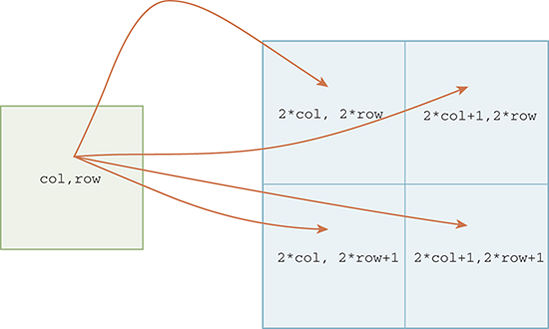

In [ ]:
import image

def doubleImage(originalImage):
    
    width  = originalImage.getWidth()
    height = originalImage.getHeight()
    
    doubledImage = image.EmptyImage(width*2, height*2)    
    for row in range(height):
        for col in range(width):
            
            pixel = originalImage.getPixel(col, row)
            
            doubledImage.setPixel(2*col,   2*row, pixel)
            doubledImage.setPixel(2*col+1, 2*row, pixel)
            doubledImage.setPixel(2*col,   2*row+1, pixel)
            doubledImage.setPixel(2*col+1, 2*row+1, pixel)
    
    return doubledImage

In [ ]:
def makeDoubleImage(imageFile):
    
    originalImage = image.FileImage(imageFile)
    width = originalImage.getWidth()
    height = originalImage.getHeight()
    
    doubledImage = doubleImage(originalImage)
    doubledImage.setPosition(0, height+1)
    
    window = image.ImageWin(width * 2, height * 3, "Double")
    originalImage.draw(window)
    doubledImage.draw(window)
    
makeDoubleImage("butterfly.png")

### Stretching

This is a more generic technique for enlarging an image. It is better than the previous algorithm because you can enlarge by an arbitrary factor and can even use the technique to shrink the image.

The stretching algorithm is the same basic concept as the resizing algorithm, except you have to think of it in reverse. Instead of coding from the standpoint of the original image (this image will be mapped to...), you write your code from the standpoint of the new image (this image should be mapped from...)

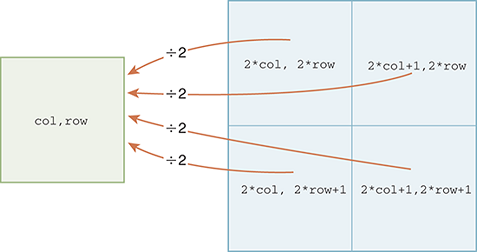

In [ ]:
import image

def stretchImage(originalImage):
    width = originalImage.getWidth()
    height = originalImage.getHeight()
    stretchedImage = image.EmptyImage(width*2, height*2) # stretch to twice the size, but could have chosen differently
    
    for stretchedX in range(stretchedImage.getWidth()):
        for stretchedY in range(stretchedImage.getHeight()):
            originalX = stretchedX // 2            # working in reverse
            originalY = stretchedY // 2            # the //2 needs to match the opposite of the *2 stretch
            pixel = originalImage.getPixel(originalX, originalY)
            stretchedImage.setPixel(stretchedX, stretchedY, pixel)
            
    return stretchedImage

In [ ]:
def makeStretchedImage(imageFile):
    
    originalImage = image.FileImage(imageFile)
    width = originalImage.getWidth()
    height = originalImage.getHeight()
    
    stretchedImage = stretchImage(originalImage)
    stretchedImage.setPosition(0, height+1)
    
    window = image.ImageWin(width * 2, height * 3, "Stretch")
    originalImage.draw(window)
    stretchedImage.draw(window)
    
makeStretchedImage("butterfly.png")

### Exercises

Complete the exercises on page 210. Each of these functions should take 20-25 lines of code.

- 6.23 hint: start with the stretching algorithm
- 6.24 hint: you could do this with the same function, but it won't be as good as algorithms that average the surrounding pixels
- 6.25 (optional, fun, and harder)
- 6.26 (optional, fun, and harder)

#### Homework
Exercise 6.23 and 6.24 are due as homework. Submit through code through Blackboard. I recommend that you write these in an editor, to be run from the command line. You can do it in jupyter, but it will probably take longer. You don't need to send me the whole python file, you can just type up the python.

Problems 6.25 and 6.26 are extra credit and quite a bit harder (10 points each)... but I'm actually going to run them and make sure that they work. No extra credit for attempts. We can meet if you need help.

## -- End of Day 2 --

### Flipping an Image

It's pretty easy to flip an image, we just move pixels from the left side to the right side (and visa-versa). For some reason the book calls a "vertical flip" what I would call a horizontal flip. The book is referring to the axis of rotation whereas you and I are likely referring to the orientation of the image. I've kept the book's terms here for consistency.

In [ ]:
import image

def verticalFlip(originalImage):
    height = originalImage.getHeight()
    width = originalImage.getWidth()
    last = width - 1
    
    flippedImage = image.EmptyImage(width, height)
    for x in range(width):
        for y in range(height):
            pixel = originalImage.getPixel(last - x, y)
            flippedImage.setPixel(x, y, pixel)
            
    return flippedImage

In [ ]:
def makeVerticalFlip(imageFile):
    
    originalImage = image.FileImage(imageFile)
    width = originalImage.getWidth()
    height = originalImage.getHeight()
    
    flippedImage = verticalFlip(originalImage)
    flippedImage.setPosition(width+1, 0)
    
    window = image.ImageWin(width*2, height, "Vertical Flip")
    originalImage.draw(window)
    flippedImage.draw(window)
    
makeVerticalFlip("butterfly.png")

### Exercises

Complete the exercises on page 212:

- 6.27
- 6.29

### Edge Detection

In [ ]:
import image
def convertToGrayscale(originalImage):
    
    width = originalImage.getWidth()
    height = originalImage.getHeight()
    modifiedImage = image.EmptyImage(width, height)
    
    for row in range(height):
        for col in range(width):
            
            pixel = originalImage.getPixel(col, row)
            pixelIntensity = pixel.getRed() + pixel.getGreen() + pixel.getBlue()
            avgRGB = pixelIntensity // 3
            pixel = image.Pixel(avgRGB, avgRGB, avgRGB)            
            modifiedImage.setPixel(col, row, pixel)
            
    return modifiedImage

In [ ]:
def convolve(originalImage, pixelRow, pixelCol, kernel):
    
    kernelColBase = pixelCol - 1
    kernelRowBase = pixelRow - 1
    
    total = 0
    for row in range(kernelRowBase, kernelRowBase+3):#start top left and go to right
        for col in range(kernelColBase, kernelColBase+3):#start at top left and go down
            
            kColIndex = col - kernelColBase
            kRowIndex = row - kernelRowBase
            
            pixel = originalImage.getPixel(col, row)
            intensity = pixel.getRed() #does not matter if r,g, or b
            total = total + intensity * kernel[kRowIndex][kColIndex]
            
    return total

In [ ]:
import math

def edgeDetect(originalImage):
    
    grayscale = convertToGrayscale(originalImage)

    edgeImage = image.EmptyImage(originalImage.getWidth(), originalImage.getHeight())
    black = image.Pixel(0, 0, 0)
    white = image.Pixel(255, 255, 255)
    xMask = [ [-1, -2, -1], [0, 0, 0], [1,2,1] ]
    yMask = [ [1, 0, -1], [2, 0, -2], [1,0,-1] ]
    
    for row in range(1, originalImage.getHeight()-1):
        for col in range(1, originalImage.getWidth()-1):
            gX = convolve(grayscale, row, col, xMask)
            gY = convolve(grayscale, row, col, yMask)
            g = math.sqrt(gX**2 + gY**2)
            if g > 175:
                edgeImage.setPixel(col, row, black)
            else:
                edgeImage.setPixel(col, row, white) 
    return edgeImage

In [ ]:
def makeEdgeDetection(imageFile):
    
    originalImage = image.FileImage(imageFile)
    width = originalImage.getWidth()
    height = originalImage.getHeight()
    
    edgeImage = edgeDetect(originalImage)
    edgeImage.setPosition(width+1, 0)
    
    window = image.ImageWin(width * 2, height, "Edge Detection")
    originalImage.draw(window)
    edgeImage.draw(window)
    
makeEdgeDetection("butterfly.png")

### Exercises

Complete the exercises on page 218:

- 6.35
- 6.37 (don't be afraid to task for help on this one)
- 6.39 (optional, but would be helpful if you want to do more image processing)

### Homework
Exercise 6.35 and 6.37 are due as homework. Submit through code through Blackboard. I recommend that you write these in an editor, to be run from the command line. You can do it in jupyter, but it will probably take longer. If possible, submit the actual .py files that you created.

#### 6.37 Hint
The convolution function for a basic blur is shown in the book. You'll apply it to each pixel in a similar way to the edge detection convolution function. The difference is that there's only one kernel, not two. But you're not going to use the exact kernel mentioned in the book, this will turn your image all white because it will increase the pixel intensitity so much that each pixel will be (255, 255, 255). It's important that return the ***weighted average*** of the surrounding pixels. Notice that there are 12 components to the kernel (e.g., $(1 + 2 + 1) + (2 + 1 + 2) + (1 + 2 + 1)$). So you'll need to multiply the convolusion by $1/12$ in order to maintain the proper intensity.

## -- End of Day 3 --

## Your Homework Project

### Overview

Write a python program that creates a $3 \times 3$ collage of images (nine pictures total). The collage should be based on a single original picture that is placed in the center "5" position. The original image should probably be smaller than 400x300 or else your collage will be too big to fit on most screens.
```
1 2 3
4 5 6
7 8 9
```
The picture below shows my solution to the project. The original picture is the purple rose in the middle. All of the other images are created by the program using filters and other tranforms (Note: I used a slightly more advanced algorithm for outlining and blurring the image than what is used by the book. You are welcome to use the books version or to look up a more complex filter).

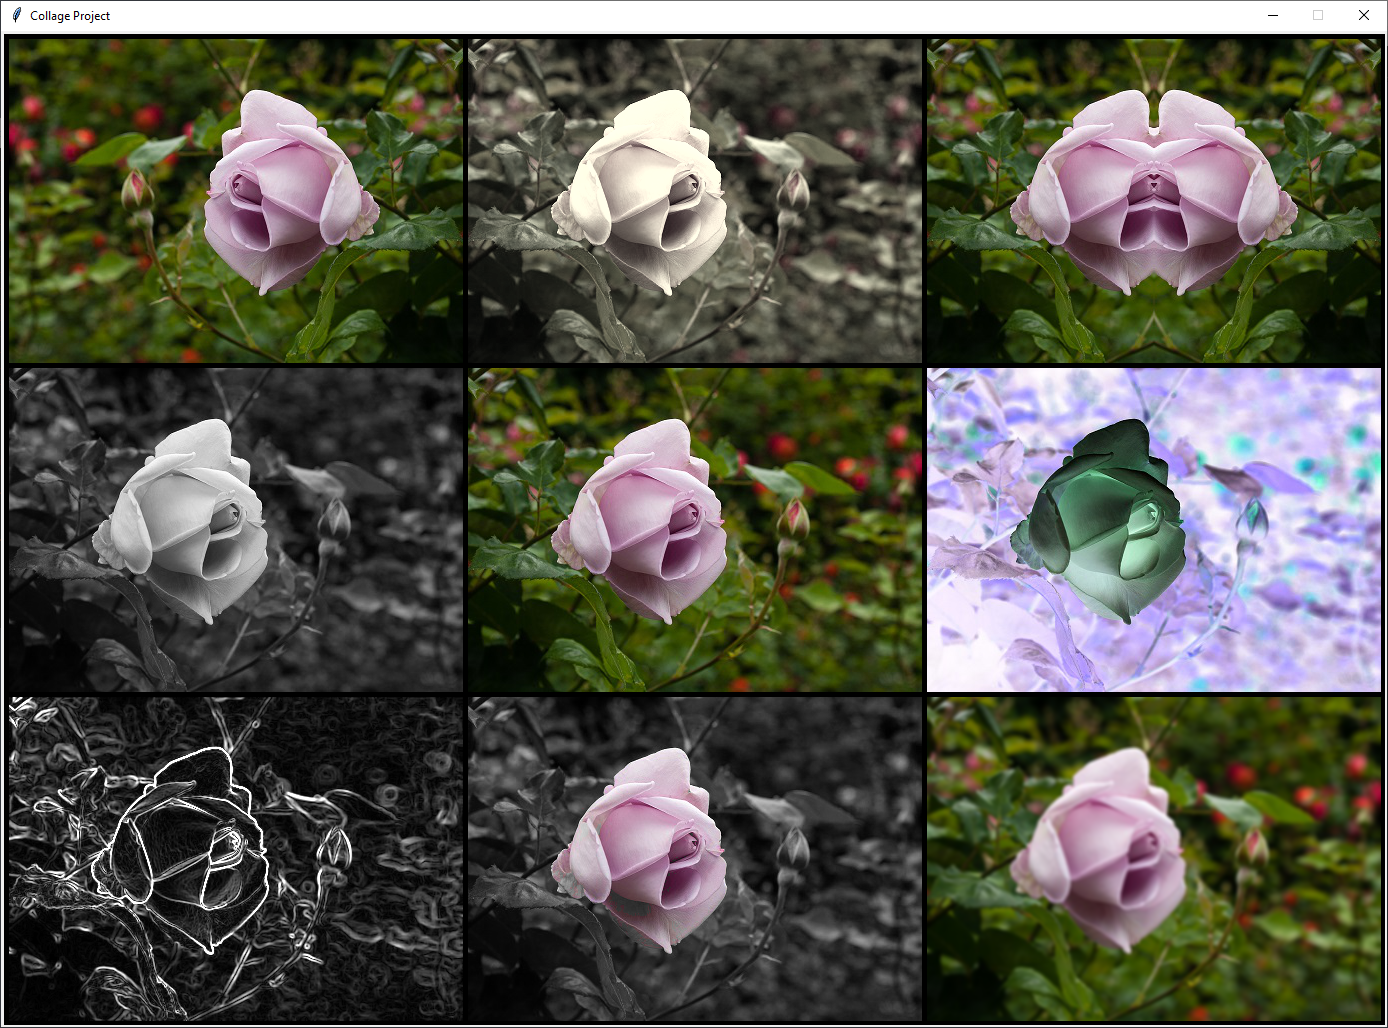

### Details

Your project should take the name of an image file as its only command line parameter. You'll run it like this: `python3 2020_Fall_FirstLast_CollageProject.py flower.jpg`.

Your program should produce a new image that is $3 \times$ the width and $3 \times$ the height of the original. Your new image will contain a total of 9 versions of the specified image:

1. horizontal flip (upper left)
- sepia filter (top)
- horizontal mirror through the middle (upper right)
- grayscale filter (left)
- the original image
- negative filter (right)
- edge detection filter (lower left)
- your choice (bottom)
- blurred filter (lower right)

### Grading

This project is worth a total of 100 points and should be submitted through Blackboard. Scores will be assigned based on the following rubric:
* 10 points for the correct name 2020_Fall_FirstLast_CollageProject.py
* 10 points for the horizontal flip
* 10 points for the sepia filter
* 10 points for the horizontal mirror
* 10 points for the grayscale filter
* 10 points for the negative filter
* 10 points for the edge detection filter
* 10 points for the your choice of filter
* 10 points for the blurred image filter
* 10 points for having nicely formatted and reasonably commented code

There is 10 points of extra credit available if you add the code to save your collage to disk. There is another 10 extra points available for implementing a 9th filter and replacing the middle image (original) with your custom filter. This 9th filter must use a convolution filter and a kernel mask. Finally, there is 10 extra credit points for detecting the overall screen resolution and then automatically shrinking large images so that the 3x3 collage will fit on the current monitor.

```
import tkinter as tk
root = tk.Tk()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
```
Screen resolution code taken from this article on [this article](https://stackoverflow.com/questions/3949844/how-to-get-the-screen-size-in-tkinter/3949983#3949983) on StackOverflow.


### Hints

You have probably created most of these filters as we worked through this chapter, and have them inside of your python notebook. But you wrote each algorithm on its own and created a window that could hold only two images. The trick will be to use all eight algorithms at once. You'll need to create a new image that is $3 \times$ the width and $3 \times$ the height of the original image. Take out a sheet of paper and map where each image is going to be located. They should each be located some factor of the width or height (e.g., zero, one, or two times the original dimensions).

Then create eight different functions that take as parameters: the original image, the location to place the image (width and height). Each of these functions should return the modified image. So your code will look something like this:

```
blurredImage = makeSepiaImage(originalImage, width*2, height*2)
window.draw(blurredImage)
```